<a href="https://colab.research.google.com/github/francomanca93/fundamentos-NLP-con-python-y-NLTK/blob/main/2_aplicaciones_estad%C3%ADsticas_del_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicaciones | Estadísticas del lenguaje

In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [ ]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [ ]:
len(text1)

260819

## Medida de riqueza lexica en un texto: 

Calcular algunas metricas sobre el texto

Cuando tenemos un texto, es normal que algunas palabras se repitan. Queremos definir cuantas palabras unicas se utilizaron respecto al total de palabras del texto. Cuanto mas grande sea nuestra riqueza lexica, mas palabras diferentes utilizo nuestro autor.

$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

Primero realizamos la construcción de un vocabulario (identificamos las palabras unicas que hay en el libro)

Utilizamos la funcion [set()](https://docs.python.org/2/library/sets.html), esta toma la lista de tokens y elimina repetidos, dejando una lista de palabras, con una estructura de datos sort. Para convertirlo a otra estructura usamos **sorted()**. Con esta funcion ordenamos alfabeticamente nuestro set y lo convertimos en lista.




In [ ]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [ ]:
rl = len(vocabulario)/len(text1)
rl

0.07406285585022564

Podemos definir funciones en python para las medidas léxicas:

In [ ]:
def riqueza_lexica(texto):
  vocabulario = sorted(set(texto))
  return len(vocabulario)/len(texto)

In [ ]:
riqueza_lexica(text1)

0.07406285585022564

In [ ]:
def porcentaje_palabra(palabra, texto):
  porcentaje_palabra = 100 * texto.count(palabra)/len(texto)
  return porcentaje_palabra

In [ ]:
porcentaje_palabra('monster', text1)

0.018786974875296663

In [ ]:
text1.count('monster')

49

## Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`

In [ ]:
# Realizar un for básico, computacionalmete es muy pesado si tenemos muchos tokens
dic = {}
for palabra in set(text1):
  dic[palabra] = text1.count(palabra)
dic

Utilizamos el método FreqDist de NLTK. Este procesa un objeto de texto de una forma diferente a la que lo haría un for, ya que estaríamos hablando de un Big **On ** 2**, osea tiene **crecimiento polinominial**, estos son algoritmos que deben usarse cuando el input o la entrada de datos es pequeña.

In [ ]:
fdist = FreqDist(text1)
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

Con el método `most_common()` obtenemos las palabras que mas frecuencia tienen en el texto. La tokenización incluyo palabras simples e inclusive signos de puntuación, y por la carácteristica de nuestro lenguaje, estos tipos de tokens son los que mas se utilizan, aunque no de información relevante sobre lo que se este diciendo/escrbiendo.

Los tokens mas frecuentes no son las palabras las interesante para obtener información linguistica o gramatical de lo que el texto tiene.

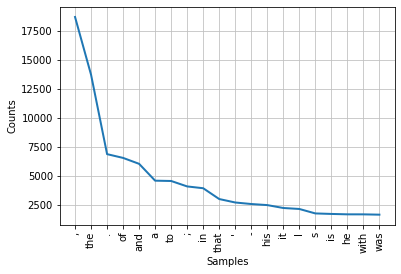

In [ ]:
fdist.plot(20)

In [ ]:
fdist['monster']

49

Analizando este tipo de datos se encuentran aspectos relacionados con los sistemas complejos. Un ejemplo es que tanto en el libro de Moby Dick como en cualquier obra ( un periódico, la biblia, etc.) la distribución de palabras sigue una ley de potencias (o power law). Una explicación a este fenómeno se da con la criticalidad auto-organizada. Para verificar si se cumple esta ley de potencias se debe verifica una tendencia linear graficando en escala logarítmica ambos ejes (un gráfico log-log). En el caso del libro de Moby Dick tenemos:

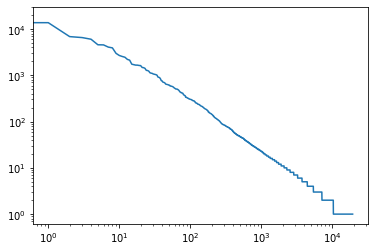

In [ ]:
a=list(fdist.values())
a=np.array(a)
a=np.sort(a)
a=a[::-1]
plt.yscale('log')
plt.xscale('log')
plt.plot(a)

Esto se conoce como la ley de Zipf. En el libro “How nature works” de Per Bak 

## Refinamiento y visualización de cuerpos de texto

Distribuciones sobre contenido con filtro-fino

* En la sección anterior vimos que los tokens más frecuentes en un texto no son necesariamente las palabras que mas informacion nos arrojan sobre el contenido del mismo. 
* Por ello, es mejor filtrar y construir distribuciones de frecuencia que no consideren signos de puntuación o caracteres especiales

In [ ]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:10]

['ACCOUNT',
 'ADDITIONAL',
 'ADVANCING',
 'ADVENTURES',
 'AFFGHANISTAN',
 'AFRICA',
 'AGAINST',
 'ALFRED',
 'ALGERINE',
 'AMERICA']

Podemos ahora construir una lista de tuplas, basados en los conteos ya pre-calculados de la función `FreqDist`, así:

`fdist_filtrado = [('account', 2), ('additional', 32), ('advancing', 5), ...]`

Luego podemos convertir el objeto creado a formato de `np.array`de **Numpy** para poder hacer un sort por palabras mas frecuentes.

`fdist_filtrado = np.array(fdist_filtrado, *args)`

`np.sort(fdist_filtrado, *args) = [('account', 2), ('advancing', 5), ('additional', 32), ...]`

In [ ]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra] > 10]
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

In [ ]:
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')
palabras_interesantes

In [ ]:
palabras_interesantes[-20:]

array([(b'between', 117), (b'something', 119), (b'against', 132),
       (b'things', 132), (b'thought', 149), (b'CHAPTER', 150),
       (b'without', 154), (b'Pequod', 172), (b'should', 181),
       (b'almost', 186), (b'Starbuck', 196), (b'himself', 203),
       (b'Captain', 215), (b'through', 227), (b'whales', 237),
       (b'little', 247), (b'Queequeg', 252), (b'seemed', 283),
       (b'before', 293), (b'though', 335)],
      dtype=[('word', 'S10'), ('frequency', '<i8')])

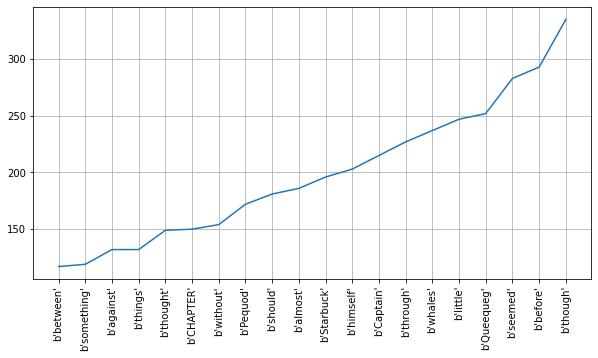

In [ ]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation='vertical')
plt.grid(True)
plt.show()

Refinemos lo anterior, mejoremos nuestro código y eliminemos las stopwords. 

stopwords: Son palabras vacías, es decir, palabras sin significado como artículos, pronombres, preposiciones, etc.

In [ ]:
import re
from nltk.corpus import stopwords
from collections import Counter

nltk.download('stopwords')
stop_words = stopwords.words('english')

%matplotlib inline

In [ ]:
def fdist(corpus):
    # patron para eliminar 
    pattern = r'\w+(?:-\w+)*'
    search = re.compile(pattern)

    lower = [word.lower() for word in corpus]
    counts = Counter(lower)  # https://docs.hektorprofe.net/python/modulos-y-paquetes/modulo-collections/

    for word, count in counts.items():
        if not search.search(word):
            continue

        if word not in stop_words:
            yield word, count


In [ ]:
dtypes = [('word', 'U15'), ('frequency', int)]
words = np.array( list(fdist(text1)), dtype=dtypes )
words = np.sort(words, order='frequency')[::-1]

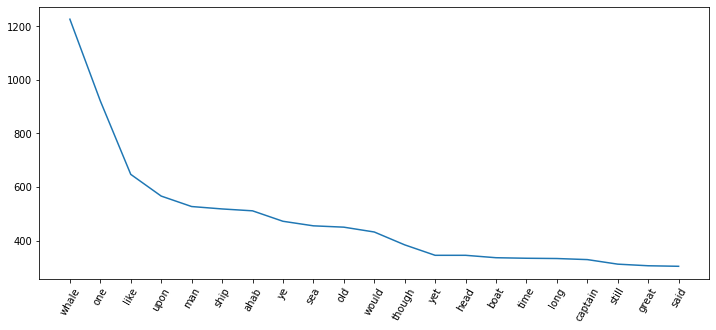

In [ ]:
n_words = 21
x, y = zip(*words[:n_words])

plt.figure(figsize=(12,5))

plt.plot(x, y)
plt.xticks(x, rotation=60)

plt.show()
